In [1]:
# Import Packages
import pandas as pd
from pandas import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')

In [2]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [3]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [4]:
cust_filter = data['cust_id'] == 'klant_69'
date_filter = data['procesdag'].dt.dayofweek <= 4
#data = data.where(date_filter & cust_filter).dropna()
data = data.where(cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2015-01-01':'2020-01-01']

In [5]:
data.drop(['procesdag'], axis='columns', inplace=True)
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [6]:
print(data)

             cust_id  aantal_pakketten validation_column
procesdag                                               
2015-01-02  klant_69             400.0             train
2015-01-03  klant_69               0.0             train
2015-01-04  klant_69             181.0             train
2015-01-05  klant_69             337.0             train
2015-01-06  klant_69             328.0             train
...              ...               ...               ...
2019-12-28  klant_69               0.0        validation
2019-12-29  klant_69             771.0        validation
2019-12-30  klant_69             546.0        validation
2019-12-31  klant_69             249.0        validation
2020-01-01  klant_69               0.0              test

[1826 rows x 3 columns]


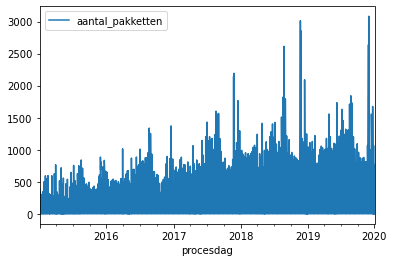

In [7]:
data.plot()

Text(0.5, 1.0, 'Data Klant 69')

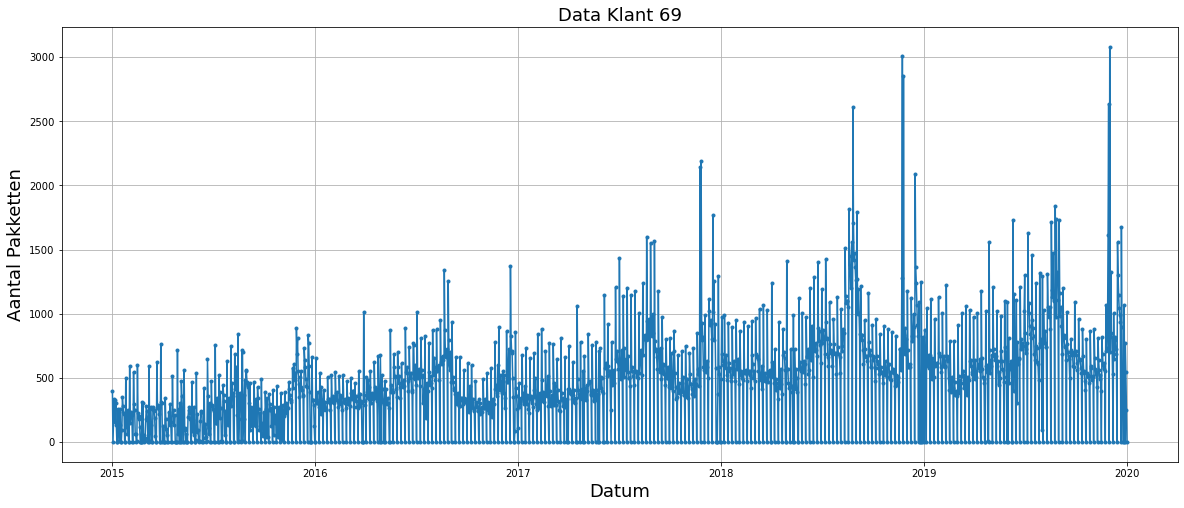

In [8]:
plt.figure(figsize=(20,8))

plt.plot(data['aantal_pakketten'], '.-')

plt.grid()
plt.xlabel('Datum',fontsize= 18)
plt.ylabel('Aantal Pakketten',fontsize= 18)
plt.title('Data Klant 69',fontsize= 18)